In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import utils
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [ ]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def load_cifar_batch(file):
    data_dict = unpickle(file)
    images = data_dict[b'data']
    labels = data_dict[b'labels']
    images = images.reshape(len(images), 3, 32, 32).transpose(0, 2, 3, 1)
    return images, np.array(labels)

def load_cifar10(data_dir):
    train_images = []
    train_labels = []
    for i in range(1, 6):
        batch_filename = f'{data_dir}/data_batch_{i}'
        images, labels = load_cifar_batch(batch_filename)
        train_images.append(images)
        train_labels.append(labels)
    train_images = np.concatenate(train_images, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)

    test_filename = f'{data_dir}/test_batch'
    test_images, test_labels = load_cifar_batch(test_filename)

    return (train_images, train_labels), (test_images, test_labels)

data_dir = '/content/drive/MyDrive/Computer Vision Coursework/cifar-10-batches-py'

(X_train, y_train), (X_test, y_test) = load_cifar10(data_dir)

print("Training images shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


In [ ]:
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)


input_X_train = X_train.astype('float32')
input_X_test = X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

# Batch Size = 64, Epoch = 100

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
625/625 [==============================] - 13s 10ms/step - loss: 1.7901 - accuracy: 0.3251 - val_loss: 1.3945 - val_accuracy: 0.4924
Epoch 2/100
625/625 [==============================] - 4s 6ms/step - loss: 1.3965 - accuracy: 0.4874 - val_loss: 1.1907 - val_accuracy: 0.5735
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 1.2574 - accuracy: 0.5459 - val_loss: 1.1013 - val_accuracy: 0.6185
Epoch 4/100
625/625 [==============================] - 4s 7ms/step - loss: 1.1699 - accuracy: 0.5832 - val_loss: 1.0194 - val_accuracy: 0.6489
Epoch 5/100
625/625 [==============================] - 4s 6ms/step - loss: 1.1026 - accuracy: 0.6083 - val_loss: 0.9625 - val_accuracy: 0.6608
Epoch 6/100
625/625 [==============================] - 4s 6ms/step - loss: 1.0525 - accuracy: 0.6284 - val_loss: 0.9008 - val_accuracy: 0.6845
Epoch 7/100
625/625 [==============================] - 4s 6ms/step - loss: 1.0169 - accuracy: 0.6410 - val_loss: 0.8753 - val_accuracy: 0.69

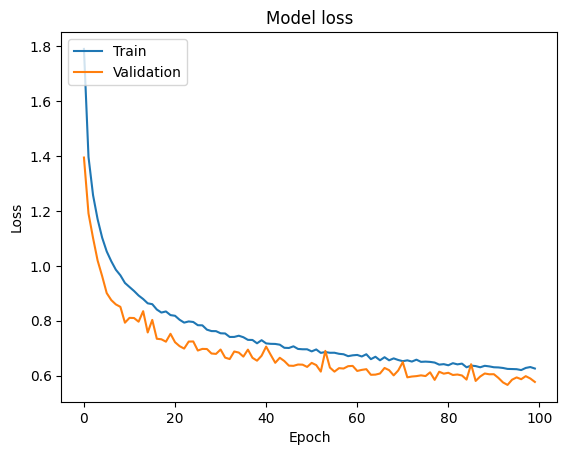

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

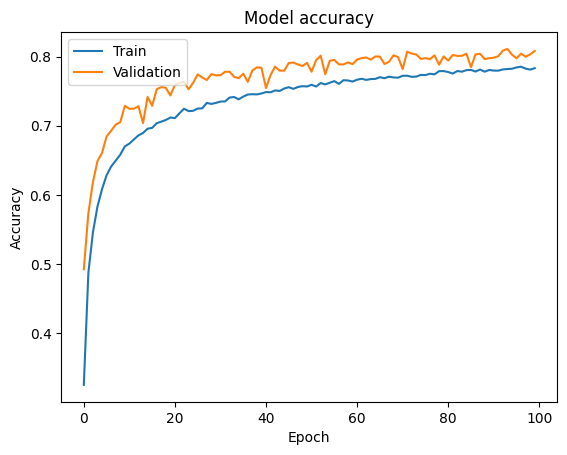

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:

test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.5929 - accuracy: 0.8032
Test loss: 0.5928761959075928
Test accuracy: 0.8032000064849854


In [ ]:
from tensorflow.keras import optimizers

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
625/625 [==============================] - 5s 6ms/step - loss: 2.3089 - accuracy: 0.1030 - val_loss: 2.3015 - val_accuracy: 0.0991
Epoch 2/100
625/625 [==============================] - 5s 8ms/step - loss: 2.3035 - accuracy: 0.1034 - val_loss: 2.3007 - val_accuracy: 0.1034
Epoch 3/100
625/625 [==============================] - 4s 7ms/step - loss: 2.3014 - accuracy: 0.1045 - val_loss: 2.3000 - val_accuracy: 0.1025
Epoch 4/100
625/625 [==============================] - 3s 6ms/step - loss: 2.3002 - accuracy: 0.1059 - val_loss: 2.2993 - val_accuracy: 0.1033
Epoch 5/100
625/625 [==============================] - 5s 9ms/step - loss: 2.2971 - accuracy: 0.1089 - val_loss: 2.2982 - val_accuracy: 0.1066
Epoch 6/100
625/625 [==============================] - 4s 7ms/step - loss: 2.2955 - accuracy: 0.1089 - val_loss: 2.2968 - val_accuracy: 0.1159
Epoch 7/100
625/625 [==============================] - 4s 7ms/step - loss: 2.2926 - accuracy: 0.1147 - val_loss: 2.2950 - val_accuracy: 0.1376

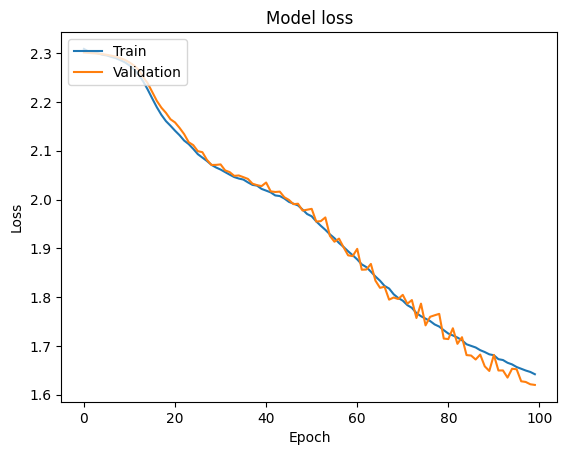

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

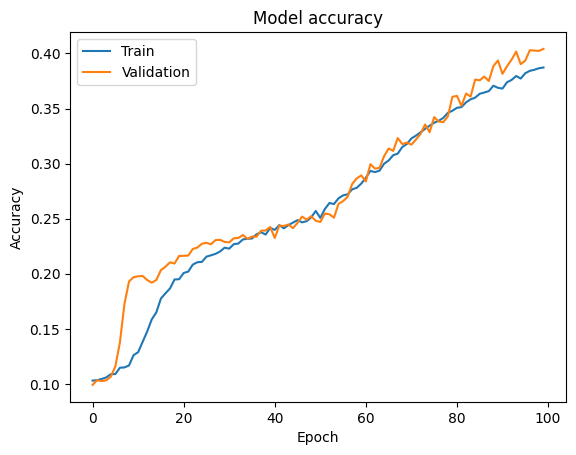

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 1.6069 - accuracy: 0.4115
Test loss: 1.606873869895935
Test accuracy: 0.4115000069141388


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
625/625 [==============================] - 7s 9ms/step - loss: 1.7884 - accuracy: 0.3262 - val_loss: 1.4145 - val_accuracy: 0.4860
Epoch 2/100
625/625 [==============================] - 4s 6ms/step - loss: 1.3987 - accuracy: 0.4894 - val_loss: 1.2157 - val_accuracy: 0.5602
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 1.2607 - accuracy: 0.5461 - val_loss: 1.0866 - val_accuracy: 0.6265
Epoch 4/100
625/625 [==============================] - 5s 7ms/step - loss: 1.1723 - accuracy: 0.5809 - val_loss: 1.0180 - val_accuracy: 0.6442
Epoch 5/100
625/625 [==============================] - 4s 6ms/step - loss: 1.1146 - accuracy: 0.6046 - val_loss: 0.9392 - val_accuracy: 0.6755
Epoch 6/100
625/625 [==============================] - 4s 6ms/step - loss: 1.0641 - accuracy: 0.6233 - val_loss: 0.9190 - val_accuracy: 0.6883
Epoch 7/100
625/625 [==============================] - 4s 6ms/step - loss: 1.0245 - accuracy: 0.6384 - val_loss: 0.9184 - val_accuracy: 0.6726

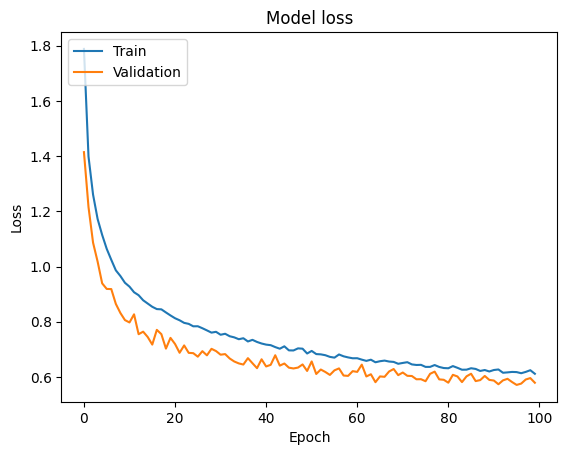

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

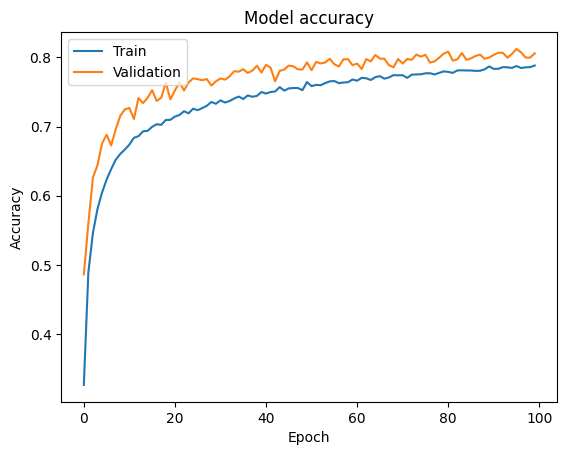

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.6029 - accuracy: 0.8020
Test loss: 0.6029040813446045
Test accuracy: 0.8019999861717224


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
625/625 [==============================] - 6s 7ms/step - loss: 2.3079 - accuracy: 0.0994 - val_loss: 2.3023 - val_accuracy: 0.0974
Epoch 2/100
625/625 [==============================] - 4s 7ms/step - loss: 2.3049 - accuracy: 0.1017 - val_loss: 2.3016 - val_accuracy: 0.1115
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 2.3025 - accuracy: 0.1073 - val_loss: 2.3009 - val_accuracy: 0.1240
Epoch 4/100
625/625 [==============================] - 4s 6ms/step - loss: 2.3011 - accuracy: 0.1092 - val_loss: 2.3000 - val_accuracy: 0.1399
Epoch 5/100
625/625 [==============================] - 4s 7ms/step - loss: 2.3002 - accuracy: 0.1074 - val_loss: 2.2990 - val_accuracy: 0.1533
Epoch 6/100
625/625 [==============================] - 4s 6ms/step - loss: 2.2985 - accuracy: 0.1129 - val_loss: 2.2977 - val_accuracy: 0.1597
Epoch 7/100
625/625 [==============================] - 4s 6ms/step - loss: 2.2969 - accuracy: 0.1133 - val_loss: 2.2960 - val_accuracy: 0.1659

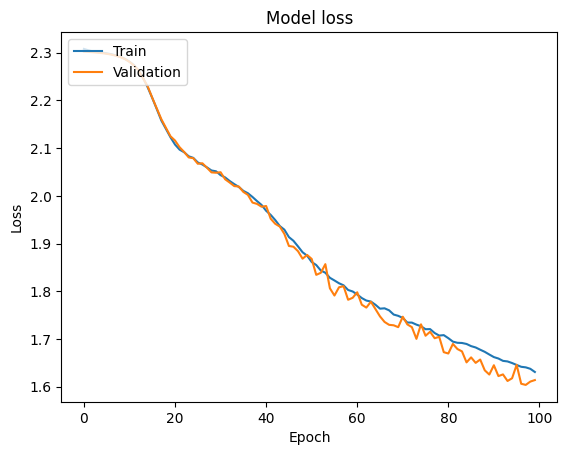

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

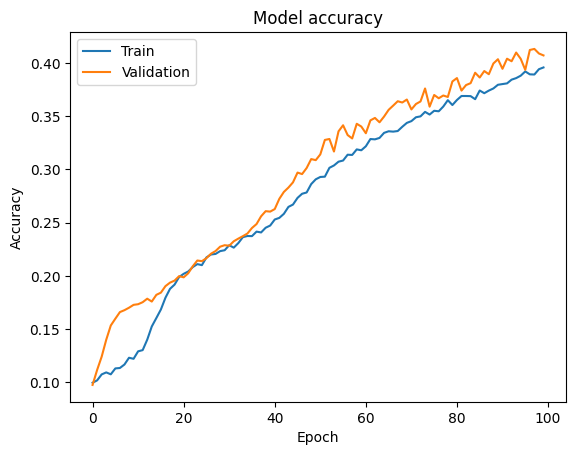

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 1.6041 - accuracy: 0.4093
Test loss: 1.6041131019592285
Test accuracy: 0.4092999994754791


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
625/625 [==============================] - 6s 7ms/step - loss: 2.3090 - accuracy: 0.0993 - val_loss: 2.3038 - val_accuracy: 0.0952
Epoch 2/100
625/625 [==============================] - 4s 6ms/step - loss: 2.3035 - accuracy: 0.1010 - val_loss: 2.3034 - val_accuracy: 0.1022
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 2.3037 - accuracy: 0.1004 - val_loss: 2.3031 - val_accuracy: 0.1025
Epoch 4/100
625/625 [==============================] - 4s 6ms/step - loss: 2.3035 - accuracy: 0.0989 - val_loss: 2.3038 - val_accuracy: 0.1014
Epoch 5/100
625/625 [==============================] - 4s 6ms/step - loss: 2.3037 - accuracy: 0.1006 - val_loss: 2.3035 - val_accuracy: 0.1003
Epoch 6/100
625/625 [==============================] - 5s 7ms/step - loss: 2.3037 - accuracy: 0.0998 - val_loss: 2.3038 - val_accuracy: 0.0952
Epoch 7/100
625/625 [==============================] - 4s 7ms/step - loss: 2.3035 - accuracy: 0.1012 - val_loss: 2.3033 - val_accuracy: 0.1016

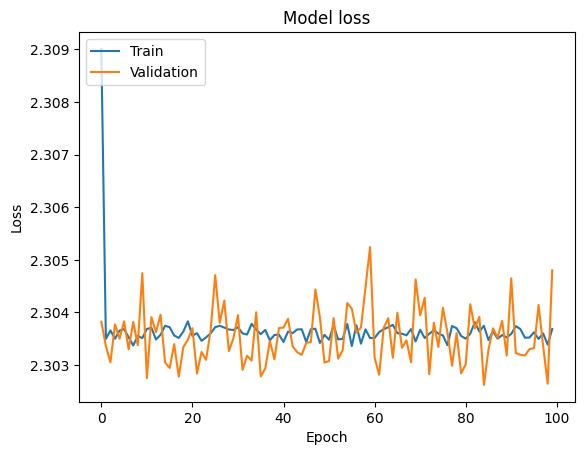

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

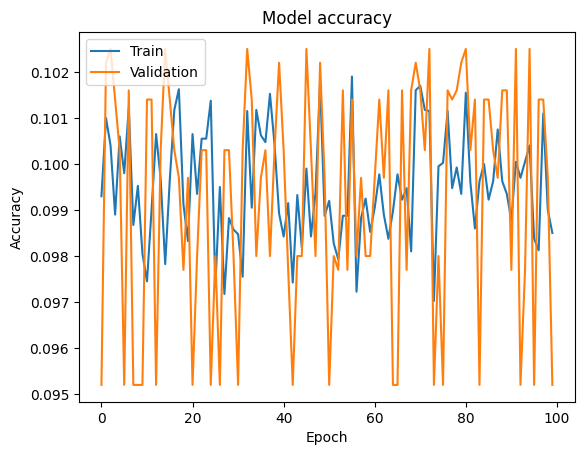

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 2.3043 - accuracy: 0.1000
Test loss: 2.3043437004089355
Test accuracy: 0.10000000149011612


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
625/625 [==============================] - 6s 8ms/step - loss: 2.2971 - accuracy: 0.1081 - val_loss: 2.2860 - val_accuracy: 0.1956
Epoch 2/100
625/625 [==============================] - 4s 6ms/step - loss: 2.2223 - accuracy: 0.1666 - val_loss: 2.1688 - val_accuracy: 0.2093
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 2.1087 - accuracy: 0.2113 - val_loss: 2.0973 - val_accuracy: 0.2322
Epoch 4/100
625/625 [==============================] - 4s 7ms/step - loss: 2.0572 - accuracy: 0.2311 - val_loss: 2.0380 - val_accuracy: 0.2314
Epoch 5/100
625/625 [==============================] - 4s 6ms/step - loss: 2.0199 - accuracy: 0.2394 - val_loss: 2.0058 - val_accuracy: 0.2387
Epoch 6/100
625/625 [==============================] - 4s 6ms/step - loss: 1.9705 - accuracy: 0.2567 - val_loss: 1.9208 - val_accuracy: 0.2725
Epoch 7/100
625/625 [==============================] - 4s 6ms/step - loss: 1.8870 - accuracy: 0.2874 - val_loss: 1.8023 - val_accuracy: 0.3214

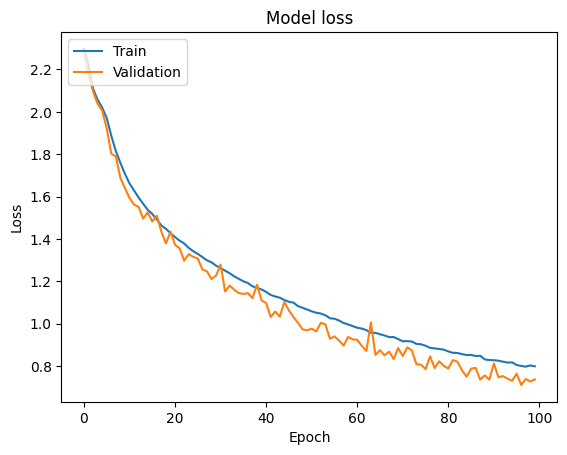

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

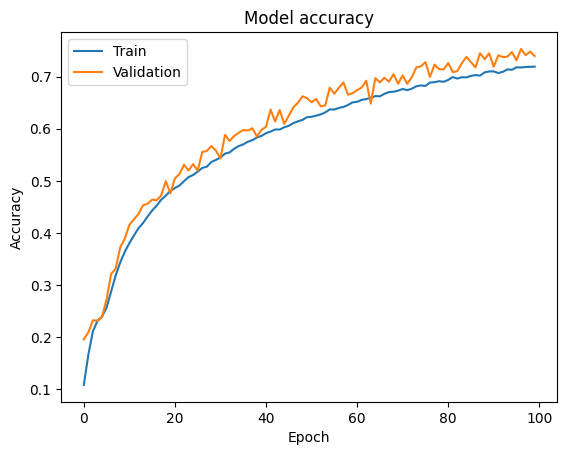

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.7581 - accuracy: 0.7370
Test loss: 0.7580734491348267
Test accuracy: 0.7369999885559082


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
625/625 [==============================] - 7s 8ms/step - loss: 2.3195 - accuracy: 0.1000 - val_loss: 2.3038 - val_accuracy: 0.0952
Epoch 2/100
625/625 [==============================] - 4s 6ms/step - loss: 2.3035 - accuracy: 0.1007 - val_loss: 2.3034 - val_accuracy: 0.1022
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 2.3037 - accuracy: 0.1003 - val_loss: 2.3031 - val_accuracy: 0.1025
Epoch 4/100
625/625 [==============================] - 5s 7ms/step - loss: 2.3044 - accuracy: 0.0996 - val_loss: 2.3038 - val_accuracy: 0.1014
Epoch 5/100
625/625 [==============================] - 4s 7ms/step - loss: 2.3037 - accuracy: 0.1006 - val_loss: 2.3035 - val_accuracy: 0.1003
Epoch 6/100
625/625 [==============================] - 4s 6ms/step - loss: 2.3037 - accuracy: 0.0998 - val_loss: 2.3038 - val_accuracy: 0.0952
Epoch 7/100
625/625 [==============================] - 5s 7ms/step - loss: 2.3035 - accuracy: 0.1012 - val_loss: 2.3033 - val_accuracy: 0.1016

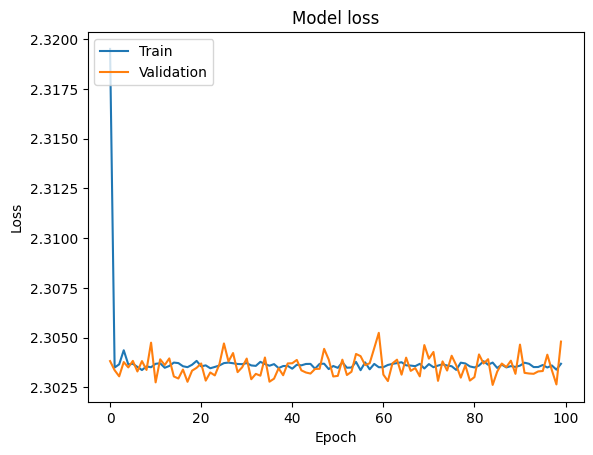

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

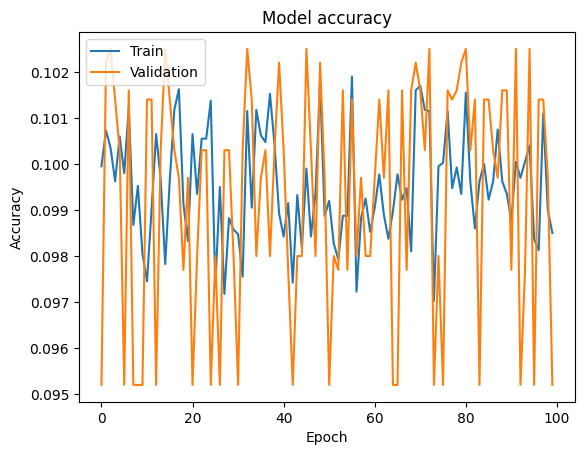

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 2.3043 - accuracy: 0.1000
Test loss: 2.3043434619903564
Test accuracy: 0.10000000149011612


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
625/625 [==============================] - 6s 7ms/step - loss: 2.2809 - accuracy: 0.1229 - val_loss: 2.2409 - val_accuracy: 0.1785
Epoch 2/100
625/625 [==============================] - 3s 6ms/step - loss: 2.1652 - accuracy: 0.1931 - val_loss: 2.1358 - val_accuracy: 0.2082
Epoch 3/100
625/625 [==============================] - 4s 7ms/step - loss: 2.0861 - accuracy: 0.2146 - val_loss: 2.0653 - val_accuracy: 0.2312
Epoch 4/100
625/625 [==============================] - 4s 7ms/step - loss: 2.0379 - accuracy: 0.2295 - val_loss: 1.9953 - val_accuracy: 0.2386
Epoch 5/100
625/625 [==============================] - 3s 6ms/step - loss: 1.9637 - accuracy: 0.2507 - val_loss: 1.9118 - val_accuracy: 0.2729
Epoch 6/100
625/625 [==============================] - 4s 6ms/step - loss: 1.8715 - accuracy: 0.2874 - val_loss: 1.7829 - val_accuracy: 0.3299
Epoch 7/100
625/625 [==============================] - 5s 7ms/step - loss: 1.8095 - accuracy: 0.3171 - val_loss: 1.7291 - val_accuracy: 0.3546

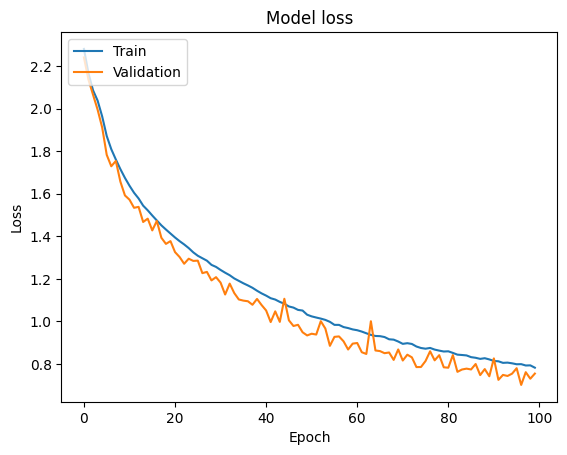

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

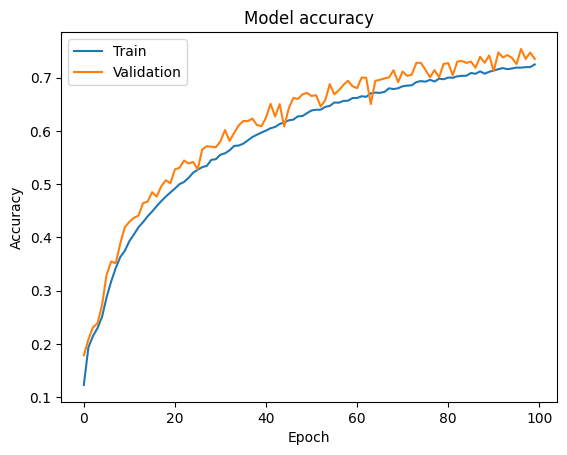

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.7748 - accuracy: 0.7279
Test loss: 0.7747559547424316
Test accuracy: 0.7279000282287598


# Batch Size = 256, Epoch = 100

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 256
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
157/157 [==============================] - 11s 23ms/step - loss: 1.9300 - accuracy: 0.2691 - val_loss: 1.6040 - val_accuracy: 0.4111
Epoch 2/100
157/157 [==============================] - 3s 16ms/step - loss: 1.5539 - accuracy: 0.4223 - val_loss: 1.3695 - val_accuracy: 0.5011
Epoch 3/100
157/157 [==============================] - 3s 17ms/step - loss: 1.3926 - accuracy: 0.4934 - val_loss: 1.2432 - val_accuracy: 0.5548
Epoch 4/100
157/157 [==============================] - 2s 15ms/step - loss: 1.2890 - accuracy: 0.5342 - val_loss: 1.1568 - val_accuracy: 0.5820
Epoch 5/100
157/157 [==============================] - 3s 19ms/step - loss: 1.2153 - accuracy: 0.5656 - val_loss: 1.0994 - val_accuracy: 0.6079
Epoch 6/100
157/157 [==============================] - 3s 16ms/step - loss: 1.1604 - accuracy: 0.5846 - val_loss: 1.0242 - val_accuracy: 0.6415
Epoch 7/100
157/157 [==============================] - 3s 18ms/step - loss: 1.1005 - accuracy: 0.6051 - val_loss: 0.9927 - val_accuracy

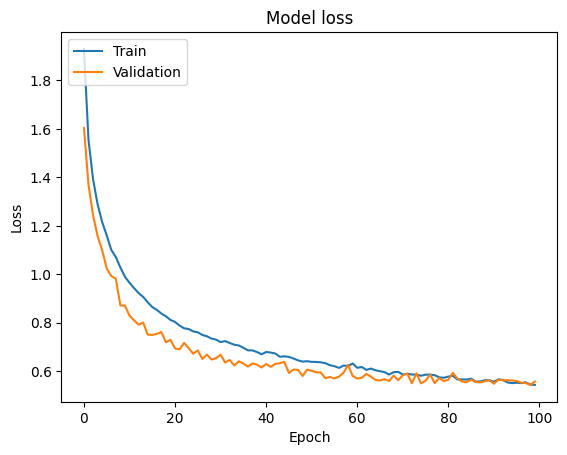

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

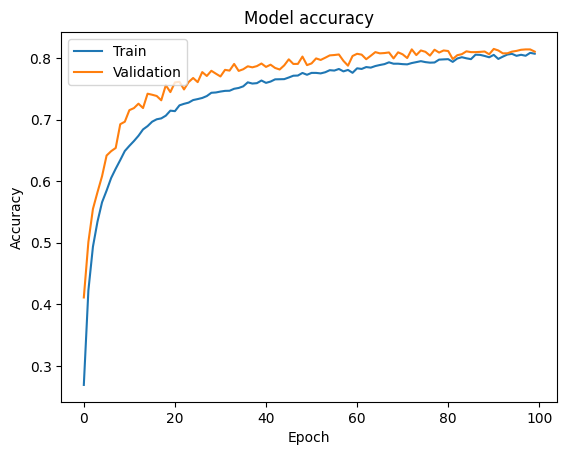

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.5653 - accuracy: 0.8037
Test loss: 0.5652605891227722
Test accuracy: 0.8036999702453613


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 256
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
157/157 [==============================] - 4s 19ms/step - loss: 2.3099 - accuracy: 0.1006 - val_loss: 2.3004 - val_accuracy: 0.1024
Epoch 2/100
157/157 [==============================] - 2s 16ms/step - loss: 2.3065 - accuracy: 0.1016 - val_loss: 2.2999 - val_accuracy: 0.1017
Epoch 3/100
157/157 [==============================] - 3s 17ms/step - loss: 2.3047 - accuracy: 0.0995 - val_loss: 2.2995 - val_accuracy: 0.1029
Epoch 4/100
157/157 [==============================] - 2s 15ms/step - loss: 2.3036 - accuracy: 0.1012 - val_loss: 2.2992 - val_accuracy: 0.1066
Epoch 5/100
157/157 [==============================] - 2s 15ms/step - loss: 2.3020 - accuracy: 0.1008 - val_loss: 2.2989 - val_accuracy: 0.1120
Epoch 6/100
157/157 [==============================] - 2s 15ms/step - loss: 2.3010 - accuracy: 0.1019 - val_loss: 2.2987 - val_accuracy: 0.1215
Epoch 7/100
157/157 [==============================] - 2s 14ms/step - loss: 2.3003 - accuracy: 0.1009 - val_loss: 2.2984 - val_accuracy:

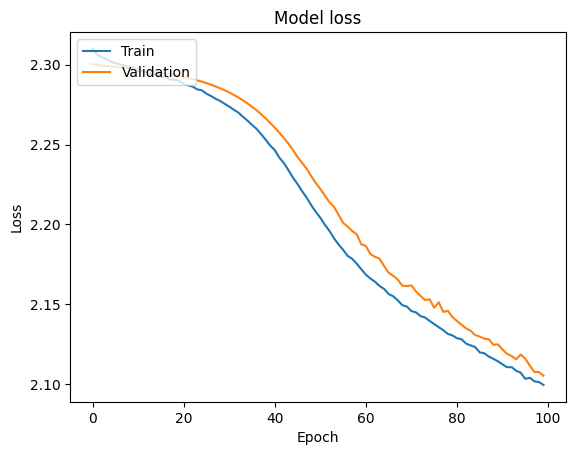

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

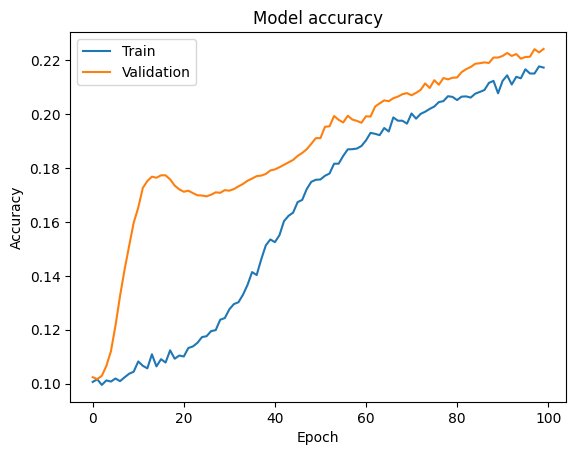

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:

test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 2.0971 - accuracy: 0.2270
Test loss: 2.0970964431762695
Test accuracy: 0.22699999809265137


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 256
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
157/157 [==============================] - 5s 19ms/step - loss: 1.9389 - accuracy: 0.2632 - val_loss: 1.6154 - val_accuracy: 0.3978
Epoch 2/100
157/157 [==============================] - 3s 17ms/step - loss: 1.5628 - accuracy: 0.4202 - val_loss: 1.3881 - val_accuracy: 0.4964
Epoch 3/100
157/157 [==============================] - 2s 15ms/step - loss: 1.4094 - accuracy: 0.4843 - val_loss: 1.2640 - val_accuracy: 0.5493
Epoch 4/100
157/157 [==============================] - 2s 15ms/step - loss: 1.3020 - accuracy: 0.5292 - val_loss: 1.1926 - val_accuracy: 0.5698
Epoch 5/100
157/157 [==============================] - 2s 14ms/step - loss: 1.2259 - accuracy: 0.5597 - val_loss: 1.0599 - val_accuracy: 0.6271
Epoch 6/100
157/157 [==============================] - 2s 15ms/step - loss: 1.1573 - accuracy: 0.5846 - val_loss: 1.0324 - val_accuracy: 0.6376
Epoch 7/100
157/157 [==============================] - 2s 16ms/step - loss: 1.1142 - accuracy: 0.6020 - val_loss: 0.9657 - val_accuracy:

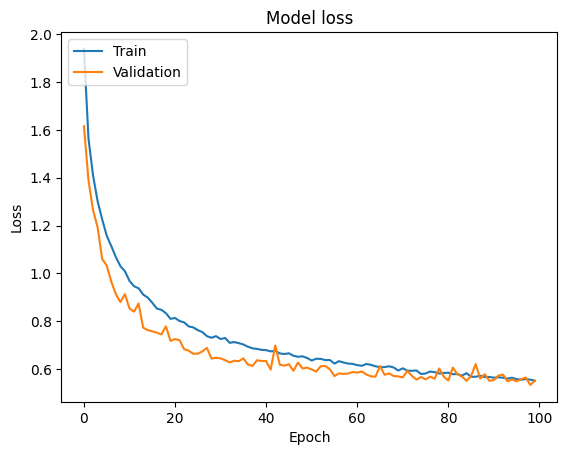

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

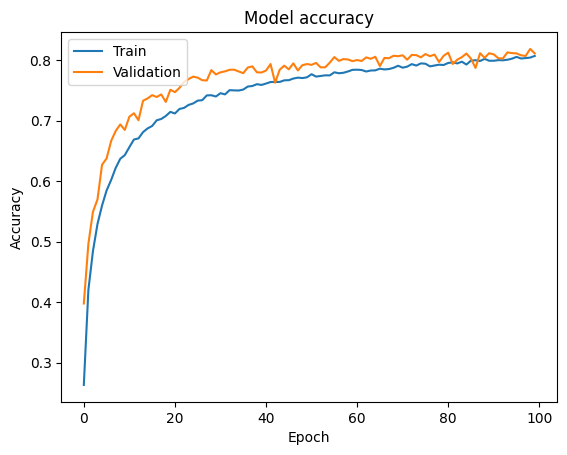

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.5729 - accuracy: 0.8056
Test loss: 0.5729378461837769
Test accuracy: 0.8055999875068665


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 256
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
157/157 [==============================] - 4s 20ms/step - loss: 2.3269 - accuracy: 0.1006 - val_loss: 2.3034 - val_accuracy: 0.0965
Epoch 2/100
157/157 [==============================] - 3s 16ms/step - loss: 2.3160 - accuracy: 0.1013 - val_loss: 2.3025 - val_accuracy: 0.0797
Epoch 3/100
157/157 [==============================] - 2s 16ms/step - loss: 2.3124 - accuracy: 0.0991 - val_loss: 2.3020 - val_accuracy: 0.0975
Epoch 4/100
157/157 [==============================] - 2s 15ms/step - loss: 2.3090 - accuracy: 0.0978 - val_loss: 2.3018 - val_accuracy: 0.1001
Epoch 5/100
157/157 [==============================] - 2s 15ms/step - loss: 2.3072 - accuracy: 0.0987 - val_loss: 2.3016 - val_accuracy: 0.0993
Epoch 6/100
157/157 [==============================] - 2s 15ms/step - loss: 2.3055 - accuracy: 0.1020 - val_loss: 2.3014 - val_accuracy: 0.0996
Epoch 7/100
157/157 [==============================] - 3s 16ms/step - loss: 2.3050 - accuracy: 0.1009 - val_loss: 2.3013 - val_accuracy:

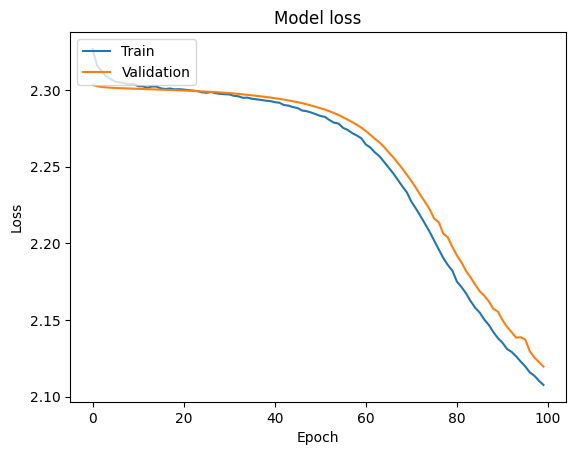

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

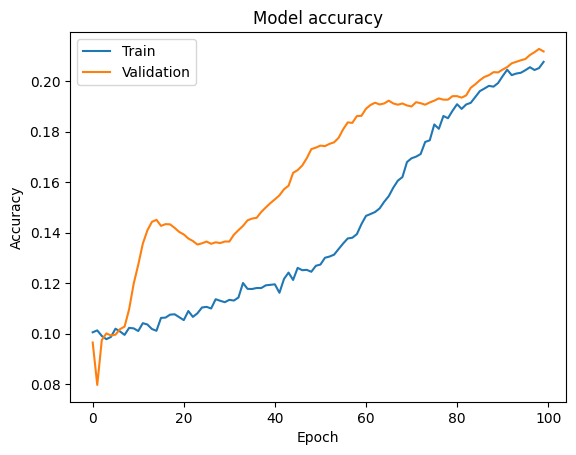

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 2.1141 - accuracy: 0.2231
Test loss: 2.1140520572662354
Test accuracy: 0.22310000658035278


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 256
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
157/157 [==============================] - 5s 19ms/step - loss: 2.3128 - accuracy: 0.0991 - val_loss: 2.3030 - val_accuracy: 0.0952
Epoch 2/100
157/157 [==============================] - 2s 14ms/step - loss: 2.3031 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1014
Epoch 3/100
157/157 [==============================] - 2s 16ms/step - loss: 2.3032 - accuracy: 0.1002 - val_loss: 2.3031 - val_accuracy: 0.0977
Epoch 4/100
157/157 [==============================] - 2s 15ms/step - loss: 2.3031 - accuracy: 0.0984 - val_loss: 2.3032 - val_accuracy: 0.1014
Epoch 5/100
157/157 [==============================] - 2s 15ms/step - loss: 2.3033 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 6/100
157/157 [==============================] - 2s 14ms/step - loss: 2.3031 - accuracy: 0.0979 - val_loss: 2.3030 - val_accuracy: 0.1016
Epoch 7/100
157/157 [==============================] - 2s 15ms/step - loss: 2.3030 - accuracy: 0.1015 - val_loss: 2.3032 - val_accuracy:

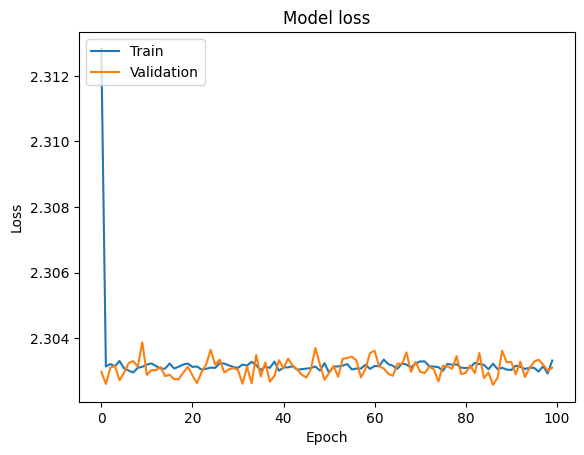

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

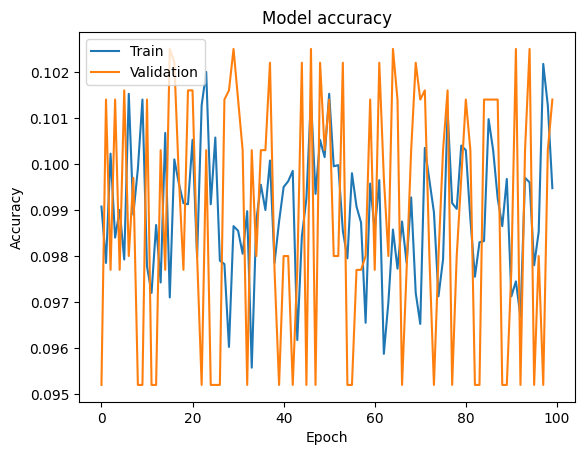

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 2.3030 - accuracy: 0.1000
Test loss: 2.3030433654785156
Test accuracy: 0.10000000149011612


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 256
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
157/157 [==============================] - 6s 26ms/step - loss: 2.3034 - accuracy: 0.1033 - val_loss: 2.2985 - val_accuracy: 0.1388
Epoch 2/100
157/157 [==============================] - 3s 16ms/step - loss: 2.2957 - accuracy: 0.1044 - val_loss: 2.2938 - val_accuracy: 0.1548
Epoch 3/100
157/157 [==============================] - 2s 14ms/step - loss: 2.2855 - accuracy: 0.1156 - val_loss: 2.2855 - val_accuracy: 0.1691
Epoch 4/100
157/157 [==============================] - 2s 15ms/step - loss: 2.2680 - accuracy: 0.1294 - val_loss: 2.2661 - val_accuracy: 0.1772
Epoch 5/100
157/157 [==============================] - 2s 15ms/step - loss: 2.2334 - accuracy: 0.1589 - val_loss: 2.2253 - val_accuracy: 0.1792
Epoch 6/100
157/157 [==============================] - 3s 16ms/step - loss: 2.1891 - accuracy: 0.1883 - val_loss: 2.1870 - val_accuracy: 0.1938
Epoch 7/100
157/157 [==============================] - 2s 16ms/step - loss: 2.1536 - accuracy: 0.2017 - val_loss: 2.1463 - val_accuracy:

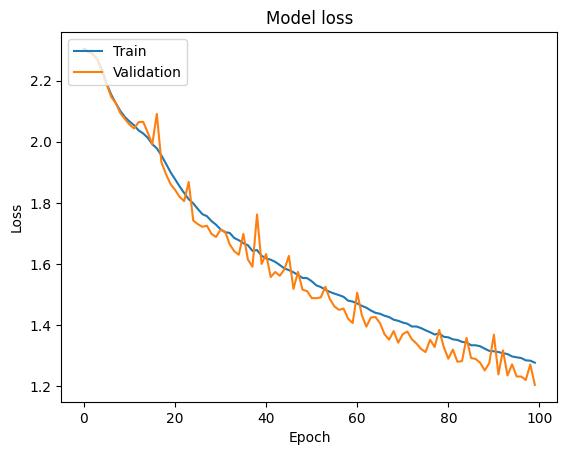

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

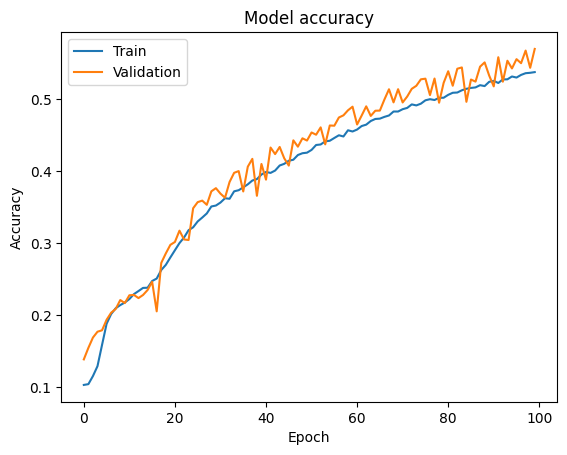

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 1.2030 - accuracy: 0.5737
Test loss: 1.202972412109375
Test accuracy: 0.5737000107765198


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 256
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
157/157 [==============================] - 5s 19ms/step - loss: 2.1605 - accuracy: 0.1779 - val_loss: 2.0213 - val_accuracy: 0.2373
Epoch 2/100
157/157 [==============================] - 2s 15ms/step - loss: 2.0001 - accuracy: 0.2412 - val_loss: 1.9282 - val_accuracy: 0.2650
Epoch 3/100
157/157 [==============================] - 2s 14ms/step - loss: 1.9468 - accuracy: 0.2589 - val_loss: 1.9797 - val_accuracy: 0.2478
Epoch 4/100
157/157 [==============================] - 2s 14ms/step - loss: 1.9194 - accuracy: 0.2720 - val_loss: 1.8974 - val_accuracy: 0.2790
Epoch 5/100
157/157 [==============================] - 2s 15ms/step - loss: 1.8863 - accuracy: 0.2880 - val_loss: 1.8719 - val_accuracy: 0.2921
Epoch 6/100
157/157 [==============================] - 3s 16ms/step - loss: 1.8494 - accuracy: 0.2976 - val_loss: 1.8641 - val_accuracy: 0.2973
Epoch 7/100
157/157 [==============================] - 2s 15ms/step - loss: 1.8290 - accuracy: 0.3099 - val_loss: 1.8357 - val_accuracy:

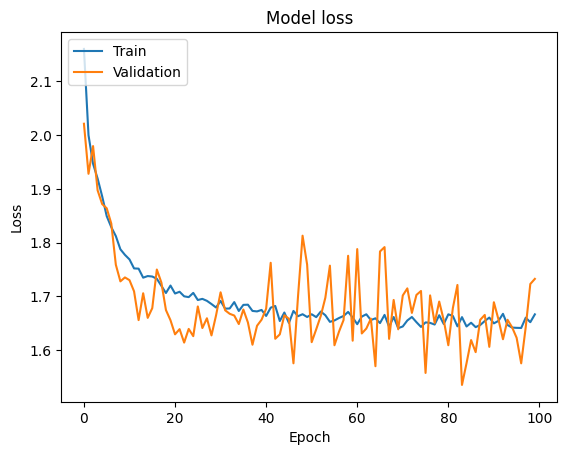

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

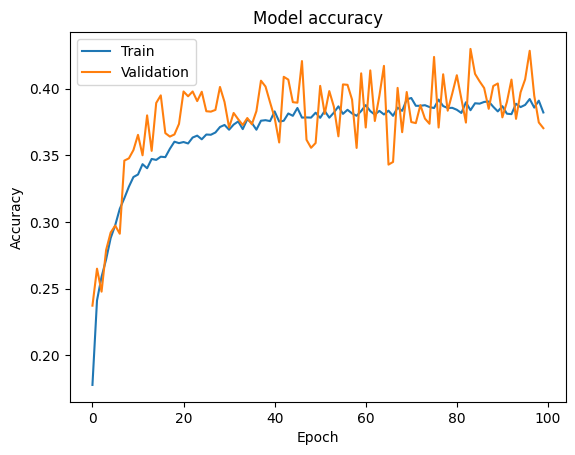

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 1.7265 - accuracy: 0.3731
Test loss: 1.7264841794967651
Test accuracy: 0.37310001254081726


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 256
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
157/157 [==============================] - 4s 21ms/step - loss: 2.3050 - accuracy: 0.1016 - val_loss: 2.2994 - val_accuracy: 0.1446
Epoch 2/100
157/157 [==============================] - 2s 15ms/step - loss: 2.2966 - accuracy: 0.1085 - val_loss: 2.2959 - val_accuracy: 0.1846
Epoch 3/100
157/157 [==============================] - 2s 14ms/step - loss: 2.2877 - accuracy: 0.1159 - val_loss: 2.2881 - val_accuracy: 0.1929
Epoch 4/100
157/157 [==============================] - 2s 14ms/step - loss: 2.2707 - accuracy: 0.1315 - val_loss: 2.2707 - val_accuracy: 0.2022
Epoch 5/100
157/157 [==============================] - 2s 15ms/step - loss: 2.2365 - accuracy: 0.1538 - val_loss: 2.2317 - val_accuracy: 0.1985
Epoch 6/100
157/157 [==============================] - 2s 15ms/step - loss: 2.1905 - accuracy: 0.1796 - val_loss: 2.1985 - val_accuracy: 0.2021
Epoch 7/100
157/157 [==============================] - 3s 16ms/step - loss: 2.1517 - accuracy: 0.1915 - val_loss: 2.1550 - val_accuracy:

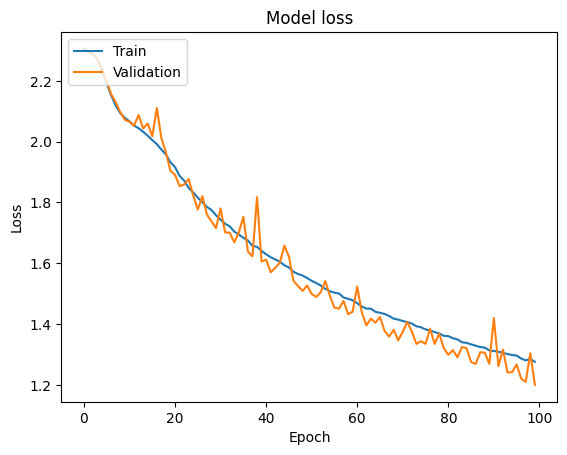

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

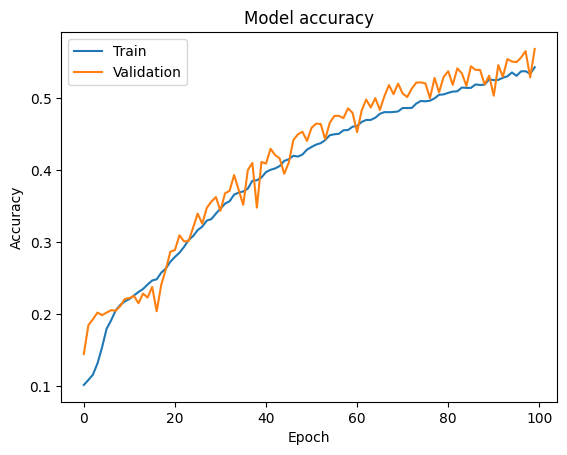

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 1.1971 - accuracy: 0.5758
Test loss: 1.197115421295166
Test accuracy: 0.5758000016212463


# Batch Size = 128

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
313/313 [==============================] - 140s 441ms/step - loss: 1.8448 - accuracy: 0.3025 - val_loss: 1.4803 - val_accuracy: 0.4492
Epoch 2/100
313/313 [==============================] - 119s 381ms/step - loss: 1.4514 - accuracy: 0.4691 - val_loss: 1.2525 - val_accuracy: 0.5561
Epoch 3/100
313/313 [==============================] - 121s 386ms/step - loss: 1.2986 - accuracy: 0.5307 - val_loss: 1.1974 - val_accuracy: 0.5783
Epoch 4/100
313/313 [==============================] - 120s 385ms/step - loss: 1.2057 - accuracy: 0.5681 - val_loss: 1.0923 - val_accuracy: 0.6103
Epoch 5/100
313/313 [==============================] - 114s 364ms/step - loss: 1.1231 - accuracy: 0.5985 - val_loss: 0.9590 - val_accuracy: 0.6627
Epoch 6/100
313/313 [==============================] - 117s 374ms/step - loss: 1.0722 - accuracy: 0.6179 - val_loss: 0.9068 - val_accuracy: 0.6848
Epoch 7/100
313/313 [==============================] - 120s 383ms/step - loss: 1.0241 - accuracy: 0.6360 - val_loss: 0

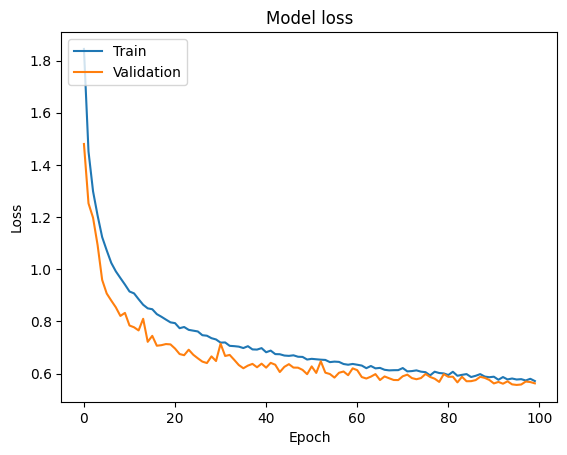

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

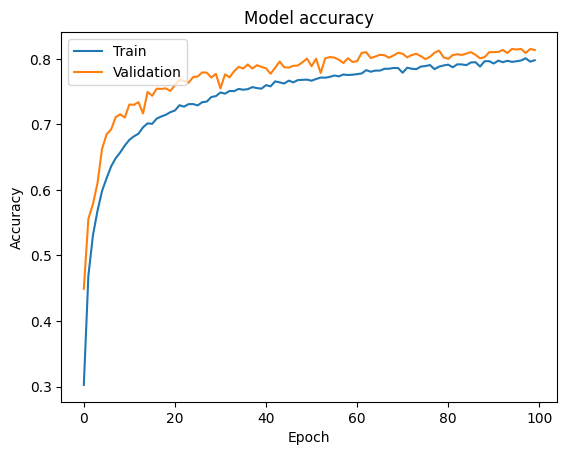

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 7s 21ms/step - loss: 0.5798 - accuracy: 0.8090
Test loss: 0.5797967910766602
Test accuracy: 0.8090000152587891


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 500

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/500
313/313 [==============================] - 10s 13ms/step - loss: 2.2996 - accuracy: 0.1050 - val_loss: 2.2940 - val_accuracy: 0.1785
Epoch 2/500
313/313 [==============================] - 3s 9ms/step - loss: 2.2762 - accuracy: 0.1255 - val_loss: 2.2697 - val_accuracy: 0.2063
Epoch 3/500
313/313 [==============================] - 3s 9ms/step - loss: 2.2135 - accuracy: 0.1742 - val_loss: 2.2018 - val_accuracy: 0.1955
Epoch 4/500
313/313 [==============================] - 3s 11ms/step - loss: 2.1477 - accuracy: 0.1996 - val_loss: 2.1328 - val_accuracy: 0.2214
Epoch 5/500
313/313 [==============================] - 3s 9ms/step - loss: 2.1068 - accuracy: 0.2117 - val_loss: 2.0921 - val_accuracy: 0.2286
Epoch 6/500
313/313 [==============================] - 3s 9ms/step - loss: 2.0749 - accuracy: 0.2219 - val_loss: 2.0754 - val_accuracy: 0.2326
Epoch 7/500
313/313 [==============================] - 3s 9ms/step - loss: 2.0488 - accuracy: 0.2296 - val_loss: 2.0228 - val_accuracy: 0.2

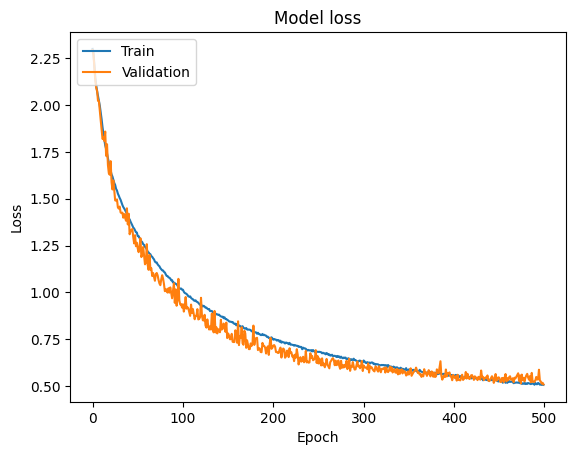

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

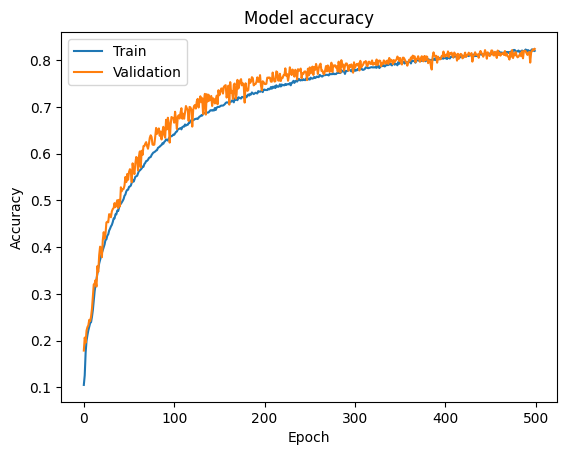

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.5366 - accuracy: 0.8128
Test loss: 0.5365780591964722
Test accuracy: 0.8127999901771545
